# Multi-class Classifier
This notebook is a demonstration of a multi-class classifer that is used to identify the letters seen in ASL obtained from the MNIST Sign Dataset: https://www.kaggle.com/datamunge/sign-language-mnist/home

In [4]:
import csv
import numpy as np
import tensorflow as tf
from os import getcwd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load and preprocess data

In [5]:
# get image pixel data

def get_data(filename):
    with open(filename) as training_file:
        csv_file = csv.reader(training_file, delimiter=',')
        labels = []
        images = []
        
        first_row = True
        for row in csv_file:
            if first_row:
                first_row = False # skip first row
            else:
                labels.append(row[0])
                images.append(np.array_split(row[1:785], 28))  # append
                
        images = np.array(images, dtype=float)
        labels = np.array(labels, dtype=float)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/data/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/data/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

In [6]:
# add another dimension to the data

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

In [7]:
# image augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# data flow batch size of 32

train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=32)
validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=32)

## Model

In [9]:
# define model architecture

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [10]:
# compile with appropriate loss and optimizer

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [12]:
# train model

history = model.fit_generator(
    train_gen,
    epochs=15,
    validation_data=validation_generator,
    verbose=1
)

model.evaluate(testing_images, testing_labels, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 858 steps, validate for 225 steps
Epoch 1/15
858/858 [==============================] - 21s 25ms/step - loss: 2.5713 - accuracy: 0.2146 - val_loss: 1.4937 - val_accuracy: 0.5223
Epoch 2/15
858/858 [==============================] - 20s 24ms/step - loss: 1.7943 - accuracy: 0.4274 - val_loss: 0.9647 - val_accuracy: 0.7195
Epoch 3/15
858/858 [==============================] - 21s 24ms/step - loss: 1.3994 - accuracy: 0.5479 - val_loss: 0.6531 - val_accuracy: 0.7692
Epoch 4/15
858/858 [==============================] - 21s 24ms/step - loss: 1.1792 - accuracy: 0.6166 - val_loss: 0.5010 - val_accuracy: 0.8434
Epoch 5/15
858/858 [==============================] - 21s 24ms/step - loss: 1.0299 - accuracy: 0.6643 - val_loss: 0.4285 - val_accuracy: 0.8670
Epoch 6/15
858/858 [==============================] - 21s 24ms/step - loss: 0.9268 - accuracy: 0.6975 - val_lo

[109.81820141717301, 0.7377301]

### Results

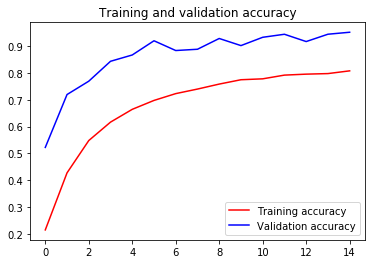

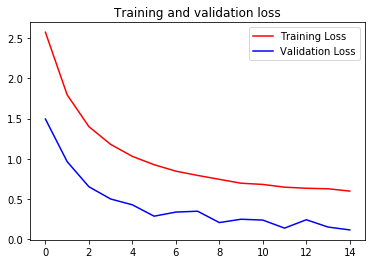

In [13]:
# plot accuraccy and loss

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()